## Lab 2: Exploratory Data Analysis, Feature Engineering, and Feature Selection 


Objectives
- Gain insights into the dataset using statistics and visualizations
- Apply feature engineering techniques like binning, encoding, outlier handling
- Use statistical tests and automated methods for feature selection

#### Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Dataset 

Titanic Dataset  
Load using: seaborn

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Exercise 1: Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


#### Step 2: Identify Attribute Types 

In [7]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.isnull().sum().sum()

np.int64(869)

#### Step 2: Identify Attribute Types

In [10]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
df['pclass'].unique()

array([3, 1, 2])

In [12]:
for col in df.columns:
    if df[col].dtype in ['object']:
        print(df[col].value_counts())
        print(df[col].unique())

sex
male      577
female    314
Name: count, dtype: int64
['male' 'female']
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
['S' 'C' 'Q' nan]
who
man      537
woman    271
child     83
Name: count, dtype: int64
['man' 'woman' 'child']
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
['Southampton' 'Cherbourg' 'Queenstown' nan]
alive
no     549
yes    342
Name: count, dtype: int64
['no' 'yes']


In [13]:
for col in ['age', 'fare', 'parch']:
    if df[col].dtype in ['int64', 'float64']:
        print(col)
        print("mean:", df[col].mean())
        print("median:", df[col].median())
        print("mode:", df[col].mode())
        print("std:", df[col].std())
        print("quantile:")
        print(df[col].quantile([0, .25, .5, .75, 1]))
        print()

age
mean: 29.69911764705882
median: 28.0
mode: 0    24.0
Name: age, dtype: float64
std: 14.526497332334042
quantile:
0.00     0.420
0.25    20.125
0.50    28.000
0.75    38.000
1.00    80.000
Name: age, dtype: float64

fare
mean: 32.204207968574636
median: 14.4542
mode: 0    8.05
Name: fare, dtype: float64
std: 49.6934285971809
quantile:
0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: fare, dtype: float64

parch
mean: 0.38159371492704824
median: 0.0
mode: 0    0
Name: parch, dtype: int64
std: 0.8060572211299483
quantile:
0.00    0.0
0.25    0.0
0.50    0.0
0.75    0.0
1.00    6.0
Name: parch, dtype: float64



In [14]:
for col in df.columns:
    if col == 'survived':
        print(f"{col} : Traget")
    if df[col].dtype in ['object']:
        print(f"{col} : Catagorical")
    else:
        print(f"{col} : Catagorical")
        

survived : Traget
survived : Catagorical
pclass : Catagorical
sex : Catagorical
age : Catagorical
sibsp : Catagorical
parch : Catagorical
fare : Catagorical
embarked : Catagorical
class : Catagorical
who : Catagorical
adult_male : Catagorical
deck : Catagorical
embark_town : Catagorical
alive : Catagorical
alone : Catagorical


Text(0, 0.5, 'count')

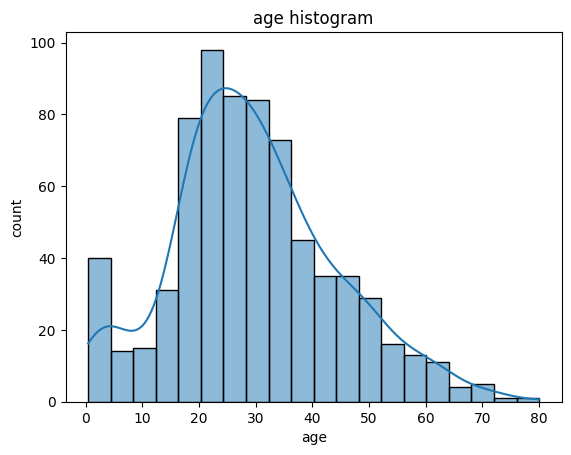

In [15]:
sns.histplot(df['age'], kde=True)
plt.title("age histogram")
plt.xlabel("age")
plt.ylabel("count")

Text(0, 0.5, 'value')

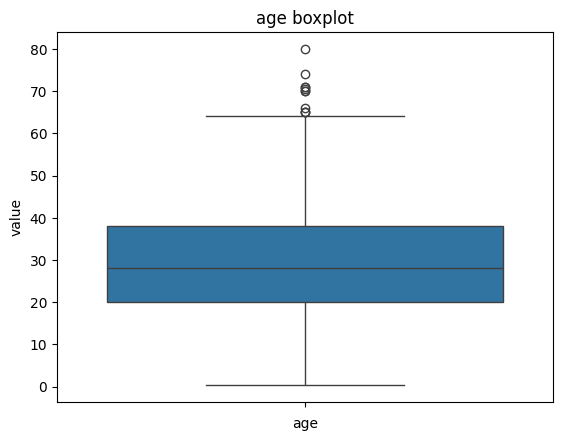

In [16]:
sns.boxplot(df['age'])
plt.title("age boxplot")
plt.xlabel("age")
plt.ylabel("value")

Text(0, 0.5, 'count')

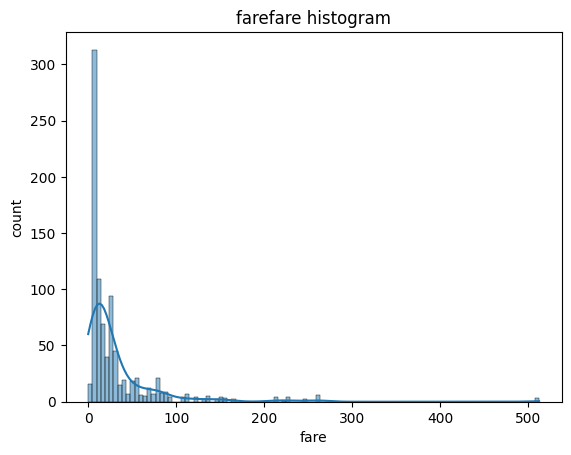

In [17]:
sns.histplot(df['fare'], kde=True)
plt.title("farefare histogram")
plt.xlabel("fare")
plt.ylabel("count")

Text(0, 0.5, 'value')

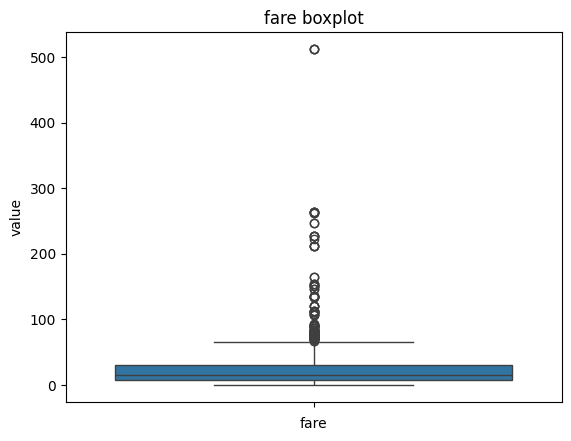

In [18]:
sns.boxplot(df['fare'])
plt.title("fare boxplot")
plt.xlabel("fare")
plt.ylabel("value")

Text(0, 0.5, 'count')

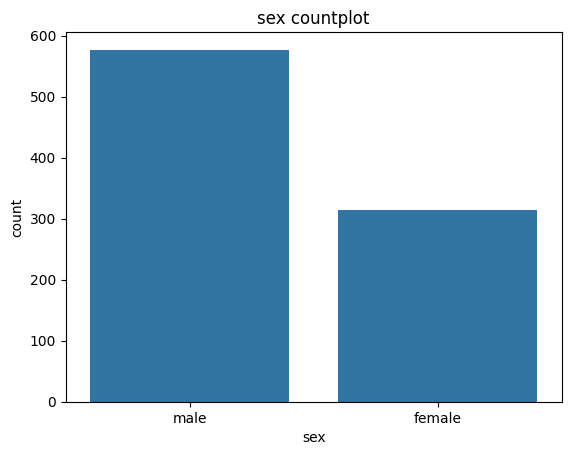

In [19]:
col = 'sex'
sns.countplot(data=df, x=col)
plt.title(f"{col} countplot")
plt.xlabel(col)
plt.ylabel("count")

Text(0, 0.5, 'count')

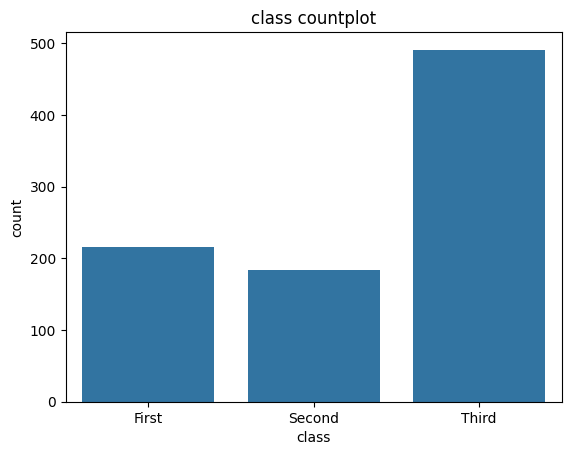

In [20]:
col = 'class'
sns.countplot(data=df, x=col)
plt.title(f"{col} countplot")
plt.xlabel(col)
plt.ylabel("count")

Text(0, 0.5, 'count')

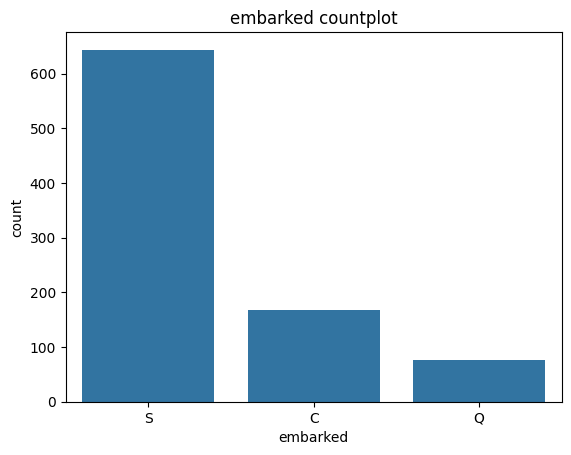

In [21]:
col = 'embarked'
sns.countplot(data=df, x=col)
plt.title(f"{col} countplot")
plt.xlabel(col)
plt.ylabel("count")

Text(0, 0.5, 'fare')

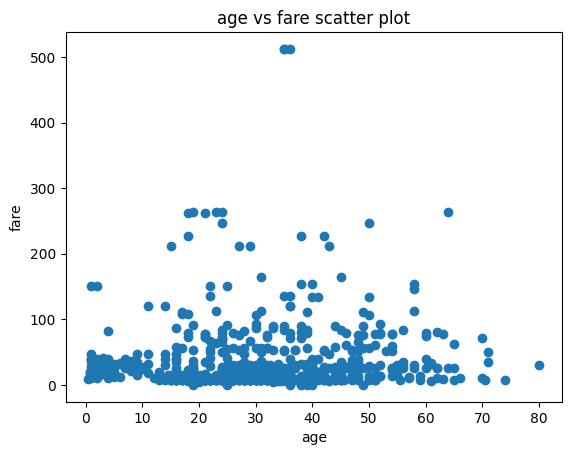

In [22]:
col1, col2 = 'age', 'fare'
plt.scatter(df[col1], df[col2])
plt.title(f"{col1} vs {col2} scatter plot")
plt.xlabel(col1)
plt.ylabel(col2)

#for col1 in df.columns:
#    if col1 in ['int64', 'float64']:
#        for col2 in df.columns:
#            if col2 in ['int64', 'float64']:

In [23]:
df4 = df[['age', 'fare', 'parch', 'sibsp']]
df4

,age,fare,parch,sibsp
0,22.0,7.2500,0,1
1,38.0,71.2833,0,1
2,26.0,7.9250,0,0
3,35.0,53.1000,0,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,0
888,NaN,23.4500,2,1
889,26.0,30.0000,0,0


In [24]:
corr_matrix = df4.corr(method='pearson')
corr_matrix

,age,fare,parch,sibsp
age,1.000000,0.096067,-0.189119,-0.308247
fare,0.096067,1.000000,0.216225,0.159651
parch,-0.189119,0.216225,1.000000,0.414838
sibsp,-0.308247,0.159651,0.414838,1.000000


Text(0.5, 1.0, 'correlation heatmap')

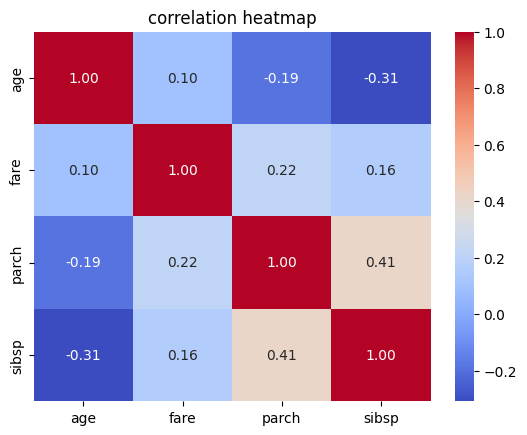

In [25]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt = '.2f')
plt.title("correlation heatmap")

In [26]:
ssct = pd.crosstab(df['sex'], df['survived'], margins=True)
ssct

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [27]:
esct = pd.crosstab(df['embarked'], df['class'], margins=True)
esct

class,First,Second,Third,All
embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


In [28]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [29]:
df['age'].fillna(df['age'].median(), inplace=True)
df['age'].isnull().sum()

C:\Program Files\KMSpico\temp\ipykernel_6448\1972061260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


np.int64(0)

In [30]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embarked'].isnull().sum()

C:\Program Files\KMSpico\temp\ipykernel_6448\1325307723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


np.int64(0)

In [31]:
df.dropna(subset=['deck'], inplace=True)
df['deck'].isnull().sum()

np.int64(0)

In [32]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [33]:
r = df[df['embark_town'].isnull()]
r

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,S,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,S,First,woman,False,B,NaN,yes,True


In [34]:
df['embark_town']

1        Cherbourg
3      Southampton
6      Southampton
10     Southampton
11     Southampton
          ...     
871    Southampton
872    Southampton
879      Cherbourg
887    Southampton
889      Cherbourg
Name: embark_town, Length: 203, dtype: object

In [35]:
df['embark_town'] = df['embark_town'].fillna('Southampton')

In [36]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [37]:
df.shape

(203, 15)